<a href="https://colab.research.google.com/github/fedebaldasso/Data-Science/blob/main/Fede_Entrega3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 #Importamos las librerías
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as image 
import seaborn as sns
import pandas as pd
import datetime as dt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import ipywidgets as widgets #librería para interacción del usuario con los gráficos
from sklearn.pipeline import Pipeline # generador de pipeline de trabajao
from sklearn.preprocessing import RobustScaler , OneHotEncoder, OrdinalEncoder #encoder para trasnformar columnas
from sklearn.model_selection import train_test_split # split de train y test
from sklearn.compose import ColumnTransformer #Permite el uso de las columnas cat y num
from sklearn.impute import SimpleImputer # llenado de valores
from sklearn.compose import make_column_selector #selector in pipeline by dtypes
import numpy as np #numpy libreria de calculo

cols = list(pd.read_csv('ds_salaries.csv', nrows =1))
df_sal = pd.read_csv('ds_salaries.csv')
del df_sal['Unnamed: 0']
df_sal.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [2]:
df_sal['work_year'] = pd.to_datetime(df_sal['work_year'], format='%Y').dt.year

In [3]:
df_sal.info() #work year aparece como int ya que solo dejo los años y no toda la fecha entera

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


Descripción de variables

work_year: El año en que se pagó el salario. experience_level: El nivel de experiencia en el puesto durante el año con los siguientes valores posibles: EN Entry-level/Junior MI Mid-level/Intermediate SE Senior-level/Experto EX Executive-level employment_type: El tipo de empleo para el puesto: PT Tiempo parcial FT Tiempo completo CT Contrato FL Freelance job_title: Rol trabajado durante el año. salary: El monto total del salario bruto pagado. salary_currency: La moneda del salario pagado como un código de moneda ISO 4217. salary in usd: El salario en USD (tasa de cambio dividida por la tasa promedio de USD para el año respectivo a través de fxdata.foorilla.com). employee_residence: El país de residencia principal del empleado durante el año laboral como código de país ISO 3166. remote_ratio: La cantidad total de trabajo realizado de forma remota, los valores posibles son los siguientes: 0 Sin trabajo remoto (menos del 20 %) 50 Parcialmente remoto 100 Totalmente remoto (más del 80 %) company_location: El país de la oficina principal del empleador o sucursal contratante como un código de país ISO 3166. company_size: Número promedio de personas que trabajaron para la empresa durante el año: S menos de 50 empleados (pequeño) M 50 a 250 empleados (mediano) L más de 250 empleados (grande)\

No encontramos valores nulos ni valores desconocidos

In [4]:
df_sal.describe(include='all').T #Obtengo una descripción completa del df

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
work_year,607.0,NaN,NaN,NaN,2021.405272,0.692133,2020.0,2021.0,2022.0,2022.0,2022.0
experience_level,607,4,SE,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,607,4,FT,588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,607,50,Data Scientist,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,607.0,NaN,NaN,NaN,324000.062603,1544357.486636,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_currency,607,17,USD,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_in_usd,607.0,NaN,NaN,NaN,112297.869852,70957.259411,2859.0,62726.0,101570.0,150000.0,600000.0
employee_residence,607,57,US,332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remote_ratio,607.0,NaN,NaN,NaN,70.92257,40.70913,0.0,50.0,100.0,100.0,100.0
company_location,607,50,US,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN


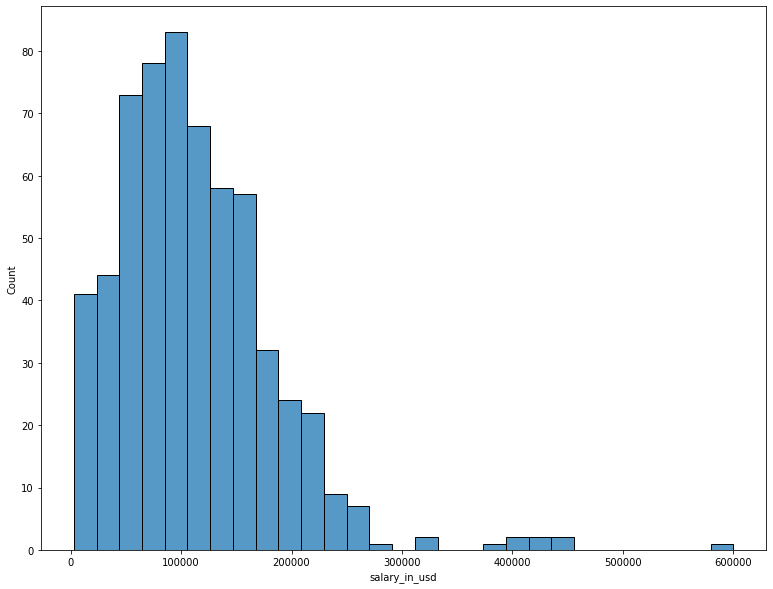

In [5]:
#Distribución de la variable Salary_in_usd

plt.figure(figsize=(13, 10))
sns.histplot(df_sal.salary_in_usd); #no distribuye normal, esta acumulado hacia los valores chicos, ideal utilizar el método de correlación de Kendall

In [6]:
df_num = df_sal.select_dtypes(include='number')
df_num.corr()  #Obtengo la correlación entre las variables solo numéricas

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.087577,0.170493,0.076314
salary,-0.087577,1.000000,-0.083906,-0.014608
salary_in_usd,0.170493,-0.083906,1.000000,0.132122
remote_ratio,0.076314,-0.014608,0.132122,1.000000


La mayor correlación de Pearson dentro de las variables numéricas se da entre salary_in_usd y work_year. 


In [7]:
df_sal.drop([ 'salary','salary_currency'], axis = 1, inplace=True) 

Salary es el salario total basandose en la moneda de pago del salario. Si nuestro target es salary in usd decidimos eliminar tanto la columna salary_currency y salary para solamente quedarnos con el salario en una unica moneda (USD).

In [8]:
#variables numéricas 
num_columns = df_sal.select_dtypes(include = ["number"]).columns
#variables catégoricas 
cat_columns = df_sal.select_dtypes(include = ["object"]).columns

In [9]:
num_columns

Index(['work_year', 'salary_in_usd', 'remote_ratio'], dtype='object')

In [10]:
#split in target 
X = df_sal.drop('salary_in_usd', axis=1) #Selecciono mi X eliminando mi variable target
y = df_sal['salary_in_usd'] #Selecciono mi target que es Salario en USD

#spliteo de train y test 
#Divido mi data set para poder obtener un conjunto para entrenar y otro para validarlo
#Obtengo un 20% de mi conjunto de datos para testearlo
X_train , X_test , y_train, y_test = train_test_split(X, y , test_size = 0.2)

In [11]:
cat_columns_ordinal = ['employee_residence', 'company_location', 'job_title']
cat_column_ohe = ['experience_level', 'employment_type', 'company_size']
num_columns_trans = ['work_year','remote_ratio']

In [12]:
#genero el pipeline para numericas 
#numeric_transformer = Pipeline(
 #   steps=[
  #      ('fill', SimpleImputer()), 
   #     ('scaler', RobustScaler())]
    #    )

#genero un pipeline para ordinal

cat_ordinal_encode = Pipeline(
    steps=[('ordinal', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))]
)
#genero un pipeline one hot para las variables nominales
cat_ohe_encode = Pipeline(
    steps=[('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))]
)

#funcion que corre ambos pipelines y luego los joinea
preprocessor = ColumnTransformer(
    transformers=[
        #("num", numeric_transformer, make_column_selector(dtype_exclude=object)),
        ('cat_ordinal',cat_ordinal_encode, cat_columns_ordinal),
        ('cat_nominal', cat_ohe_encode, cat_column_ohe)

    ]
)

#entrenamiento del pipeline
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('cat_ordinal',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['employee_residence', 'company_location',
                                  'job_title']),
                                ('cat_nominal',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['experience_level', 'employment_type',
                                  'company_size'])])

In [ ]:
#trasnformacion de datos

#colum = preprocessor.named_transformers_['cat_nominal']['ohe'].get_feature_names_out(cat_column_ohe)

#new_column = ['employee_residence', 'company_location', 'job_title','work_year','remote_ratio'] + list(colum)
  #encuentro las columnas que trabaje
#old_columns = ['employee_residence', 'company_location', 'job_title'] + ['experience_level', 'employment_type', 'company_size'] + ['work_year','remote_ratio']

#X_train_enc = pd.DataFrame(preprocessor.transform(X_train), columns = new_column, index= X_train.index)
#X_train_enc

,employee_residence,company_location,job_title,work_year,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,company_size_L,company_size_M,company_size_S
374,0.0,-2.0,19.0,17.0,24.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
473,0.0,0.0,46.0,42.0,20.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
492,0.0,0.0,38.0,35.0,20.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
419,0.0,0.0,46.0,42.0,37.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
396,0.0,0.0,17.0,10.0,35.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,0.0,0.0,46.0,42.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
45,-2.0,0.0,12.0,10.0,33.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
377,0.0,0.0,46.0,42.0,15.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
68,-2.0,0.0,46.0,42.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [13]:
# Funcion de transformarcion

def trasnform_with_pipe(pipe, X_train):
  
  #obtengo las columnas de ohe
  colum = pipe.named_transformers_['cat_nominal']['ohe'].get_feature_names_out(['experience_level', 'employment_type', 'company_size'])

  #genreo las nuevas columnas
  new_column = ['employee_residence', 'company_location', 'job_title'] + list(colum)
  #encuentro las columnas que trabaje
  old_columns = ['employee_residence', 'company_location', 'job_title'] + ['experience_level', 'employment_type', 'company_size']

  #genero dataframe con la trasnfomramcion y ademas agego clumnas nuevas y mismo indice que train
  X_train_enc = pd.DataFrame(pipe.transform(X_train), columns = new_column, index= X_train.index)
  #elimino columnas viejas
  X_train.drop( old_columns , axis=1, inplace=True)
  return pd.merge(X_train, X_train_enc, left_index=True, right_index=True)


In [14]:
#trasnform data en base a la funcion
X_train_model = trasnform_with_pipe(preprocessor, X_train)
X_test_model = trasnform_with_pipe(preprocessor, X_test)

#Entrenamiento del Modelo

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

from lightgbm.sklearn import LGBMRegressor
from xgboost import XGBRegressor
import random

In [16]:
#parametros globales para Xgboost, GBM,  LGBM
# parametros globales
num_estimators = np.linspace(100, 700, num = 10, endpoint = True).astype(int)
max_depth = random.sample(range(1, 30), 20)
learning_rate = np.arange (0.001, 1, 0.005)

#gradiante y adaboost
max_features = np.arange(start = 1, stop = X_train.shape[1]+1, step = 1)

#xgboost
booster = ['gbtree']




In [17]:
#params globales
params_global = {'n_estimators': num_estimators,
                 'max_depth': max_depth, 
                 'learning_rate': learning_rate}

In [18]:
y_train

423    180000
223     56256
431     32974
24     115000
549    160000
        ...  
427     49461
418     63900
525    177000
320    132320
167    250000
Name: salary_in_usd, Length: 485, dtype: int64

In [19]:
#seleccion de mejor algoritmo
result = {}
results1 = {}
results2 = {}
results3 = {}
#Corremos los algoritmos con una funcion que permite seleccionar las metricas
def algorit(result, modeling_1,modeling_2):
  for model in [GradientBoostingRegressor(), XGBRegressor(), LGBMRegressor()]:
    print(f'Start training {model.__class__.__name__}')

    #randomsear
    modeling = RandomizedSearchCV(model, params_global, cv=5, n_jobs=-1, refit=True, scoring= modeling_1, verbose=1, n_iter=30)

    #entrenamiento
    modeling.fit(X_train, y_train)

    #seleccion del modelo con refit 
    best_model = modeling.best_estimator_

    #metrica de test
    metrics_test = modeling_2(y_test, best_model.predict(X_test))

    #save results
    result[best_model.__class__.__name__] = {'modelo': best_model,
                                            'score_train': modeling.best_score_ * -1,
                                            'score_test': metrics_test,
                                            'params': modeling.best_params_}

  print(f'Algoritmos con Metrica: \n')
  print(modeling_1 ) 
  print(f'Listos')
    
  



A continuacion corro los algoritmos con las distintas metricas para comparar errores

In [20]:
algorit(results1,'neg_mean_absolute_error',mean_absolute_error)
algorit(results2,'neg_mean_squared_error',mean_squared_error)
algorit(results3,'neg_mean_absolute_percentage_error',mean_absolute_percentage_error)

Start training GradientBoostingRegressor
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Start training XGBRegressor
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[12:03:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Start training LGBMRegressor
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Algoritmos con Metrica: 

neg_mean_absolute_error
Listos
Start training GradientBoostingRegressor
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Start training XGBRegressor
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[12:04:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Start training LGBMRegressor
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Algoritmos con Metrica: 

neg_mean_squared_error
Listos
Start training GradientBoostingRegressor
Fitting 5 folds for each

In [21]:
#Metrica mean absolute error
Final1 = pd.DataFrame.from_dict(results1, orient='index')
Final1['error'] = abs(Final1['score_train']- Final1['score_test'])
print(Final1[['score_train','score_test','error']].sort_values(by=['error']))
#Metrica mean squared error
Final2 = pd.DataFrame.from_dict(results2, orient='index')
Final2['error'] = abs(Final2['score_train']- Final2['score_test'])
print(Final2[['score_train','score_test','error']].sort_values(by=['error']))
#Metrica mean absolute percentage error
Final3 = pd.DataFrame.from_dict(results3, orient='index')
Final3['error'] = abs(Final3['score_train']- Final3['score_test'])
print(Final3[['score_train','score_test','error']].sort_values(by=['error']))

                            score_train    score_test         error
GradientBoostingRegressor  47538.909256  59305.409649  11766.500393
LGBMRegressor              47538.508320  59306.261688  11767.753368
XGBRegressor               47538.507925  59306.261527  11767.753601
                            score_train    score_test         error
XGBRegressor               4.177513e+09  7.403693e+09  3.226180e+09
LGBMRegressor              4.177513e+09  7.403693e+09  3.226180e+09
GradientBoostingRegressor  4.177513e+09  7.403693e+09  3.226180e+09
                           score_train  score_test     error
GradientBoostingRegressor     1.049737    1.234968  0.185231
LGBMRegressor                 1.049737    1.234968  0.185231
XGBRegressor                  0.972079    1.158212  0.186134


Lo que podemos observar es que con la metrica MAE (Mean Absolute Error) el error es menor utilizando el algoritmo LGBMRegressor.
Para la metrica MSE (Mean Squared Error) el error es menor con el algoritmo XGBRegressor aunque el valor es totalmente desproporcionado y nada efectivo.
Por ultimo, con la metrica MAPE (Mean Absolute Porcentage Error) el error es menor para el algoritmo LGBMRegresor.


#Hiperparámetros

Trabajaremos con:

- GridSearch
- RandomSearch
- Optimizacion Bayesiana



## Adquisicion de datos para entenar 

Solo vamos a tomar los datos , chequear los mismos para poder ver si se puede entrenar y splitearlos

No vamos a encodear nada



In [22]:
import time

### Data Adquisicion y chequeo

Vamos a adquirir los datos y chequear que tenemos para luego perparar y dejarlisto el conjunto para los diferentes optimizaciones

Comentarios

*


In [ ]:
#deciciones

# sencillas para estudio 

#df.drop('weekday', axis=1, inplace=True)


### Spliteo de datos

Luego que tengamos decidio que problemas tenemos en el datasets, emepzamos a splitear .  Primero sera con su target y luego en train y test

### Entrenamiento de modelo

Aqui vamos a poder primero entrenar un modelo basico en el mismo cojuntoy luego ver si podemos encontrar con los metodos de optimizacion alguno modelo del mismo algoritmo qpero con otros hiperparametros



In [24]:
#carga de libreriasa usar
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


#todos los resultados los vamos a guardar para luego comparar al final
results = {}

#variables comunes
semilla = 42
seed_search_cv = 123
cv = 3
n_iter = 30

In [25]:
RandomForestRegressor()

RandomForestRegressor()

In [26]:
#seleccion del modelo
rf_basic = RandomForestRegressor(random_state = semilla)

#tiempo que demora el entrenamiento basico
start_time = time.time()
#entenamiento
rf_basic.fit(X_train, y_train)
#finish time control
end_time = time.time()


In [27]:
#Agrego los valores importantes que deseo comparar

results['base'] = {'time': round(end_time-start_time, 5),
                   'score_train': mean_absolute_error(y_train, rf_basic.predict(X_train)),
                   'score_test': mean_absolute_error(y_test, rf_basic.predict(X_test)),
                   'n_trainings': 1}

results

{'base': {'time': 0.13016,
  'score_train': 46981.523146461455,
  'score_test': 59970.48104531678,
  'n_trainings': 1}}

Dado estos valores vamos a chequear como performance con su CV dado que posiblemnte tenga overfitting

In [28]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_basic, X_train, y_train, scoring="neg_mean_absolute_error")
scores*-1

array([42626.36533306, 45238.21289794, 46563.05322204, 53995.96002211,
       52607.40285865])

Parece que tengo un poco de overfitting en todo el conjunto del entenamiento , pero cuando lo hago a nivel mas de a grupos se mantiene bien

###GridSearch

Es el metodo mas comun a usar , donde es algo simple pero que tiene un trabajo mas forzoso.

el motivo es porque no tiene un aprendizaje en su iteracion y que va a fuerza bruta , probando todo contra todo lo que se le de para probar

Eso es mas costo para iterar , porque puede haber un monton de valores que se hace imposible . Ademas tenemos que tener la suerte de seleccionar los valores acordes para iterar , porque sino capaz nunca llega a una buena performance


In [29]:
RandomForestRegressor()

RandomForestRegressor()

In [30]:
#chargar libreria
from sklearn.model_selection import GridSearchCV

#seleccion de parametros y valores del mismo
param_grid = {
    "max_features": [ 0.5, 0.7, 1],
    "n_estimators": [100, 300, 600, 800],
    "max_depth": [ 4, 20,50, 100,] ,
    "min_samples_split": [2,3,5,6]
}

# define gridsearch
reg_grid = GridSearchCV(RandomForestRegressor(random_state=42), # modelo
                        param_grid=param_grid, # grilla de combinaciones
                        cv=cv, # numeros split CV 
                        n_jobs=-1, # paralelice en todos los hilos 
                        scoring='neg_mean_absolute_error', # indico la metrica a buscar
                        verbose=3
                       )

start_time = time.time()
#iteraccion 
model_grid = reg_grid.fit(X_train, y_train)

end_time = time.time()

Fitting 3 folds for each of 192 candidates, totalling 576 fits


In [31]:
#fill new table
results['grid'] = {'time': round(end_time-start_time, 5), 
                   
                   'score_train': max(pd.DataFrame(model_grid.cv_results_)['mean_test_score'])*-1, 
                   
                   'score_test':mean_absolute_error(y_test, model_grid.predict(X_test)) , 

                   'n_trainings': pd.DataFrame(model_grid.cv_results_).shape[0] * cv}

In [32]:
results

{'base': {'time': 0.13016,
  'score_train': 46981.523146461455,
  'score_test': 59970.48104531678,
  'n_trainings': 1},
 'grid': {'time': 279.40389,
  'score_train': 47718.24636863908,
  'score_test': 60140.50945441396,
  'n_trainings': 576}}

In [33]:
model_grid.best_params_

{'max_depth': 4,
 'max_features': 0.5,
 'min_samples_split': 2,
 'n_estimators': 800}

In [34]:
pd.DataFrame(model_grid.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
95,1.519509,0.011539,0.117218,0.002542,20,1,6,800,"{'max_depth': 20, 'max_features': 1, 'min_samp...",-43606.788801,-48796.769114,-50751.181191,-47718.246369,3014.740911,1
107,1.509205,0.004672,0.117874,0.001780,50,0.5,5,800,"{'max_depth': 50, 'max_features': 0.5, 'min_sa...",-43606.788801,-48796.769114,-50751.181191,-47718.246369,3014.740911,1
103,1.512073,0.015636,0.117927,0.001961,50,0.5,3,800,"{'max_depth': 50, 'max_features': 0.5, 'min_sa...",-43606.788801,-48796.769114,-50751.181191,-47718.246369,3014.740911,1
99,1.532695,0.025580,0.127988,0.010831,50,0.5,2,800,"{'max_depth': 50, 'max_features': 0.5, 'min_sa...",-43606.788801,-48796.769114,-50751.181191,-47718.246369,3014.740911,1
91,1.537492,0.016667,0.121991,0.006446,20,1,5,800,"{'max_depth': 20, 'max_features': 1, 'min_samp...",-43606.788801,-48796.769114,-50751.181191,-47718.246369,3014.740911,1


###RandomSearch

Este metodo es diferente al anterior en un solo caso,

Que no debe iterar sobre todo el conjunto de parametros a correr, solo que lo hace con valores aleatorios del mismo

Quiere decir que podemos no ser tan exacto para seleccionar posible valores y sobre ese rango elegira un valor al azar

Metodo mas rapido para correr, se dice que con 30 iteracciones aproximadamente va a encontrar un modelo bueno

Aunque como esuna posibilidad existe que le modelo sea una performance peor

In [35]:
from scipy.stats import randint

a = randint(4, 100) 


51.5

In [36]:
#library
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint



#seleccion de varaibles y parametros
param_grid_random = {
    "max_features": [0.3, 0.5, 0.7, 1],
    "n_estimators": randint(100,1000),
    "max_depth": randint(4, 100) 
}

# Random
reg_rand = RandomizedSearchCV(RandomForestRegressor(random_state=42), # seleccion modelo
                         param_distributions=param_grid_random, # le doy los parametros
                         n_iter=n_iter, # las veces que voy a probar seleccionar los parametros ,  cantidad de entrenamientos
                         cv=cv, # split de crossvalidation
                         n_jobs=-1,
                         scoring='neg_mean_absolute_error',
                         random_state=123)
start_time = time.time()

model_rand = reg_rand.fit(X_train, y_train)

end_time = time.time()

In [37]:
#fill new table
results['random'] = {'time': round(end_time-start_time, 5), 
                   'score_train': max(pd.DataFrame(model_rand.cv_results_)['mean_test_score'])*-1, 
                   'score_test':mean_absolute_error(y_test, model_rand.predict(X_test)) , 
                   'n_trainings': pd.DataFrame(model_rand.cv_results_).shape[0] * 3}

In [38]:
results

{'base': {'time': 0.13016,
  'score_train': 46981.523146461455,
  'score_test': 59970.48104531678,
  'n_trainings': 1},
 'grid': {'time': 279.40389,
  'score_train': 47718.24636863908,
  'score_test': 60140.50945441396,
  'n_trainings': 576},
 'random': {'time': 64.78014,
  'score_train': 47699.07546602988,
  'score_test': 60130.008302017006,
  'n_trainings': 90}}

In [39]:
model_rand.best_params_

{'max_depth': 5, 'max_features': 1, 'n_estimators': 985}

In [40]:
pd.DataFrame(model_rand.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.381139,0.004609,0.032656,0.000603,70,0.3,198,"{'max_depth': 70, 'max_features': 0.3, 'n_esti...",-43610.107856,-48825.644453,-50813.378690,-47749.710333,3037.543234,13
1,0.401526,0.010865,0.031156,0.000244,21,1,206,"{'max_depth': 21, 'max_features': 1, 'n_estima...",-43604.057154,-48835.542680,-50824.608250,-47754.736028,3045.236367,16
2,1.664179,0.071733,0.142400,0.019097,61,0.7,837,"{'max_depth': 61, 'max_features': 0.7, 'n_esti...",-43597.666532,-48783.813685,-50743.051364,-47708.177194,3014.617333,6
3,1.722801,0.513205,0.124766,0.025835,51,0.5,644,"{'max_depth': 51, 'max_features': 0.5, 'n_esti...",-43604.355796,-48851.748869,-50763.089845,-47739.731503,3026.472673,12
4,0.668641,0.149786,0.080927,0.021111,50,0.3,211,"{'max_depth': 50, 'max_features': 0.3, 'n_esti...",-43638.219939,-48843.876594,-50821.655029,-47767.917187,3029.708612,21


Bayesiana optimizacion

Este metodo tambiene tiene una iteraccion , pero lo imporatnte es que mucho mas inteligente en seleccionar los hiperparametros.

Lo que se quiere decir es que por cada iteraccion se va a comprobar contra su score y realizar un probabilidad bayesiana entre el hiperparametros y el score y en base a ello seleccionara otro valor 

P (A | B) = (P(B | A) * P(A))  / P(B)

A = Score
B = Hyperparametros


Entonces por lo cual la optimizacion bayesiana converge mas rapido a unos hiperparametros optimos. 
Lo malo es que en cada iteraccion , como hace mas calculos demora un poco mas


In [41]:
!pip install git+https://github.com/scikit-optimize/scikit-optimize.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/scikit-optimize/scikit-optimize.git to /tmp/pip-req-build-ghc9ane9
  Running command git clone -q https://github.com/scikit-optimize/scikit-optimize.git /tmp/pip-req-build-ghc9ane9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached pyaml-21.10.1-py2.py3-none-any.whl (24 kB)
  Created wheel for scikit-optimize: filename=scikit_optimize-0.9.0-py2.py3-none-any.whl size=100268 sha256=aba6ca0e0cbea9ae25aa0d543d38d5efb8b6271c40a059fdc4b14c342f38878c
  Stored in directory: /tmp/pip-ephem-wheel-cache-geh9p5_z/wheels/d6/9e/e3/8818f5597f06caa60393811f8aa57eb87b8565d772046d1b72
Successfully built scikit-optimize


In [42]:
#libraria
from skopt import BayesSearchCV

In [43]:
# Bayesian

param_grid = {
    "max_features": [0.3, 0.5, 0.7, 1],
    "n_estimators": (100,  800) , #manera diferente de verificar , asi se escribe una lista de valores
    "max_depth": (4, 400) 
}

reg_bay = BayesSearchCV(RandomForestRegressor(random_state=42),
                    search_spaces=param_grid,
                    n_iter=n_iter,
                    cv=3,
                    n_jobs=-1,
                    scoring='neg_mean_absolute_error',
                    random_state=123)

start_time = time.time()

model_bay = reg_bay.fit(X_train, y_train)

end_time = time.time()

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


In [44]:
results['bayesian'] = {'time': round(end_time-start_time, 5), 
                   'score_train': max(pd.DataFrame(model_bay.cv_results_)['mean_test_score'])*-1, 
                   'score_test':mean_absolute_error(y_test, model_bay.predict(X_test)) , 
                   'n_trainings': pd.DataFrame(model_bay.cv_results_).shape[0] * 3}

In [45]:
results

{'base': {'time': 0.13016,
  'score_train': 46981.523146461455,
  'score_test': 59970.48104531678,
  'n_trainings': 1},
 'grid': {'time': 279.40389,
  'score_train': 47718.24636863908,
  'score_test': 60140.50945441396,
  'n_trainings': 576},
 'random': {'time': 64.78014,
  'score_train': 47699.07546602988,
  'score_test': 60130.008302017006,
  'n_trainings': 90},
 'bayesian': {'time': 132.74512,
  'score_train': 47717.42695362605,
  'score_test': 60140.16174525987,
  'n_trainings': 90}}

In [46]:
model_bay.best_params_


OrderedDict([('max_depth', 212), ('max_features', 0.3), ('n_estimators', 770)])

#Comparativa final

In [47]:
comparison = pd.DataFrame(results).T.reset_index()
comparison

,index,time,score_train,score_test,n_trainings
0,base,0.13016,46981.523146,59970.481045,1.0
1,grid,279.40389,47718.246369,60140.509454,576.0
2,random,64.78014,47699.075466,60130.008302,90.0
3,bayesian,132.74512,47717.426954,60140.161745,90.0


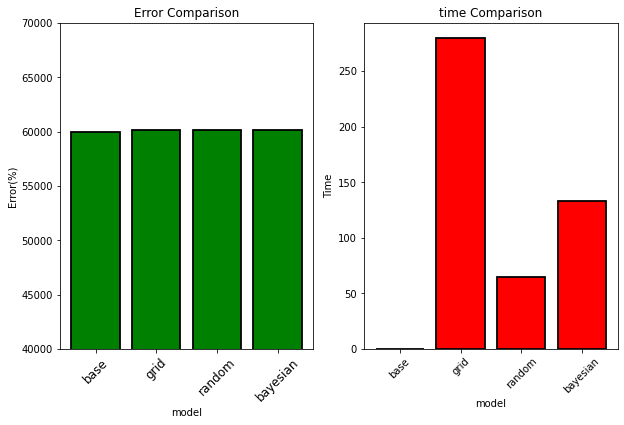

In [49]:
import matplotlib.pyplot as plt

xvalues = list(range(len(comparison)))
plt.subplots(1, 2, figsize=(10, 6))
plt.subplot(121)
plt.bar(xvalues, comparison['score_test'], color = 'g', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, comparison['index'], rotation = 45, fontsize = 12)
plt.ylim(ymin = 40000, ymax=70000)
plt.xlabel('model'); plt.ylabel('Error(%)'); plt.title('Error Comparison');

plt.subplot(122)
plt.bar(xvalues, comparison['time'], color = 'r', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, comparison['index'], rotation = 45)
plt.xlabel('model'); plt.ylabel('Time'); plt.title('time Comparison');
plt.show();

#Otros conceptos

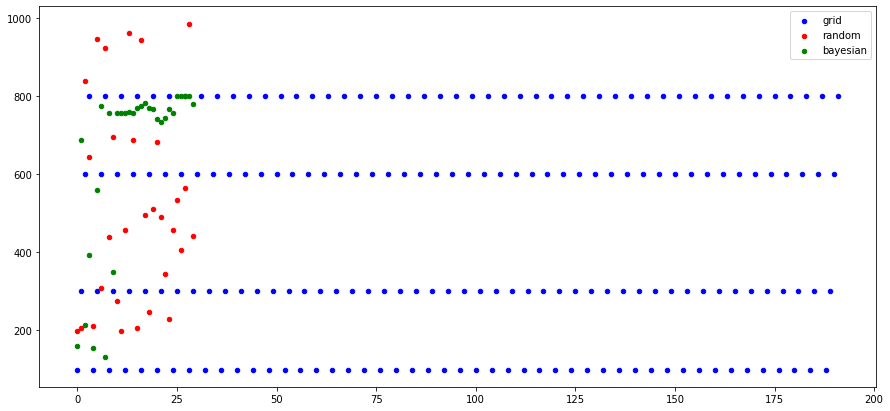

In [50]:
import numpy as np
grid = model_grid.cv_results_['param_n_estimators']
rand = model_rand.cv_results_['param_n_estimators']
bay = model_bay.cv_results_['param_n_estimators']


fig = plt.figure(figsize=(15, 7))

ax = plt.gca()
ax.scatter(np.arange(len(grid)), grid, c='b', s=20, label='grid');
ax.scatter(np.arange(len(rand)), rand.data, c='r', s=20, label='random');
ax.scatter(np.arange(len(bay)), bay, c='g', s=20, label='bayesian');
plt.legend();